***
***
# FDMS : CHALLENGE TENNIS - Li Ke, Husseini Rani
***
***

<br/>
# Méthodologie appliquée :
***
***
<br/>
¤ **Partie1 : Dataiku : Data Cleansing**<br/><br/>
***
¤ **Partie2 : Jointures & Data Augmentation**<br/>
* *Différence des Ratings* (en Dataiku) <br/>
Après avoir exploré les données et les avoir nettoyer, nous avons décider de créer de nouvelles features issues des ratings ATP des joueurs.<br/>
Donc pour chaque match nous créons les caractéristiques suivantes : moyenne des points obtenus par chaque joueur tous les trois points (*POINTS_P1, POINT_P2*), moyenne des ratings de chaque joueur tous les 3 mois (*POS_P1, POS_P2*), différence des moyennes desrating entre les deux joueurs qui disputent le match (*DIFF_RATING*). <br/> NB: on remplace les valeurs nulles de points par 0 et de ranking par 1000.<br/><br/>
* *Statistiques sur les tournois* : <a href="Tours Stats.ipynb">cf. Tours Stats</a> <br/>
Dans ce notebook nous avons effectué des statistiques concernant les antécédants de chaque joueur concernant le tournois auquel appartient le match en question. Enfin nous avons rajouté ces features à notre base et essayé pour voir l'amélioration qu'elles apportent à nos prédictions.<br/><br/>
* *Statistiques sur les terrains* : <a href="Court Stats.ipynb">cf. Court Stats</a><br/>
Dans ce notebook nous avons effectué des statistiques concernant les antécédants de chaque joueur concernant le terrain sur lequel se passe le match en question. Enfin nous avons rajouté ces features à notre base et essayé pour voir l'amélioration qu'elles apportent à nos prédictions.<br/><br/>

***    

¤ **Partie3 : Apprentissage & Tests**  <a href="#Main">(main)</a><br/>
* <a href="#Lecture des Données">Lecture de la base de Train finale</a><br/>
* ID1_G :Id du joueur 1<br/>
* ID2_G :Id du joueur 2<br/>
* ID_T_G : Id du tournois dans lequel se passe le match<br/>
* RANK_T : Catégorie à laquelle apprtient le tournois<br/>
* ID_C_T : Id du terrains dans lequel se passe le match<br/>
* ID_R_G : Id du round dans lequel se passe le match <br/>
* POINT_P1 : Moyenne des points obtenus par le joueur 1 selon ATP (tous les 3 mois)<br/>
* POS_P1 : Moyenne des ranking ATP du joueur 1 (tous les 3 mois)<br/>
* POINT_P2 : Moyenne des points obtenus par le joueur 2 selon ATP (tous les 3 mois)<br/>
* POS_P2 : Moyenne des ranking ATP du joueur 2 (tous les 3 mois)<br/>
* diff_rating : POS_P1 - POS_P2<br/>
* diff_wins_for_tour : Différence des matchs gagnés par chaque joueur pour la catégorie de tournois (RANK_T) en question<br/>
* diff_wins_for_tour_ratio : Différence des matchs gagnés par chaque joueur pour la catégorie de tournois (RANK_T) en question. Ratio de match : matchs gagnés par ce joueur pour cette catégorie / total des matchs gagnés par ce joueur (permet de connaître l'apétance du joueur pour ce type de tournois)<br/>
* diff_wins_for_court: Idem que pour diff_wins_for_tour mais pour le type de terrain sur lequel se passe le match<br/>
* diff_wins_for_court_ratio : Idem que pour diff_wins_for_tour_ratio mais pour le type de terrain<br/>
* winner : Label (1 ou 2)
<br/><br/>
* <a href="#Data Vizualisation for Train">Data Visualisation et vérification de la séparabilité des variables</a><br/>
Afin de vérifier la séparabilité de nos variables nous appliquons l'algorithme de data visualisation Isomap. Après plusieurs essais en choisissant à chaque fois des features différentes on trouve que les trois features diff_rating, diff_wins_for_tour et diff_wins_for_court sont les plus séparables. Ce qui nous réconforte car ce sont nos features principales.
<br/><br/>
* <a href="#Features Importance / Dimensionnality Reduction">Détermination de l'importance des features et réduction de la dimensionnalité</a><br/>
Dans cette partie on souhaite adapter les dimensions de notre base à chaque modèle d'apprentissage que nous pouvons utiliser. Le but étant, selon le modèle, d'un côté éliminer les caractéristiques inintéressantes pour améliorer l'apprentissage et d'un autre côté de diminuer la dimensionnalité afin de diminuer le temps d'apprentissage.<br/>
Pour cela, nous cherchons l'importance de chaque feature de notre base selon une bonne partie des modèles d'apprentisage que nous pouvons utiliser (SVM linéaire, Randomized Logistic Regression, Random Forest Tree, AdaBoost, Gradient Boosting). Nous rajoutons à ces résultats, l'importance des features selon l'algorithme RFE (recursive feature elimination).<br/><br/>
* <a href="#Features Selection">Sélection des Features</a><br/>
En fonction des résultats obtenus précédemment, on créé les bases de train des algorithmes AdaBoost, Random Forest Tree et Gradient Boosting en éliminant les features non importantes pour chacune d'elles.<br/><br/>
* <a href="#Model Selection">Sélection du modèle à adopter</a><br/>
Nous apprenons ensuite nos données selon des modèles: Logistic Regression, KNN score, SVM score, Bagging, AdaBoost, Random Forest Tree, Gradient Boosting. Nous testons tous nos modèles et affichons les resultats.<br/>Nous trouvons que les trois meilleurs modèles pour nos données sont les algorithmes ensemblistes: Bagging, Adaboost, Random Forest Tree et Gradient Boosting (avec 0.72% de bonne prédiction).<br/><br/>
* <a href="#Model Tuning">Tuning des meilleurs modèles obtenus</a><br/>
On fait ici le tuning des modèles d'apprentissage les plus performants pour notre problème, en essayant de trouver les hyper-paramètres qui donnent les meilleurs résultats. Nous avons également essayé le module GridSerchCV de la librairie sklearn qui trouve les meilleurs hyper-paramètres à partir de Cross-validations, or le compromis entre précision et temps de calcul était très mauvais ce qui nous a poussé à l'abandonner.<br/>
On observe au final que le **Gradient Boosting** donne les meilleurs résultats pour notre cas.
<br/><br/>

* <a href="#Test du Modèle Final">Test sur le meilleur modèle finalement obtenu après tuning</a><br/>
Pour résumer cette partie de notre travail, on test une dernière fois le modèle choisi (Gradient Boosting) avec les données sélectionnées pour lui et après avoir trouvé les bons hyper-paramètres à lui appliquer.<br/>Nous obtenons un taux de bonne prédiction de **72.91%** sur nos tests.<br/><br/>
***
¤ **Partie4 : Prédiction et préparation du fichier leaderboard**

* <a href="#Prediction">Prédiction sur la base de test</a><br/>
Prédiction sur la base "games_atp_public".<br/><br/>
* <a href="#Data Visualisation sur Test">Data Visualisation sur nos prédictions</a><br/>
Afin de visualiser nos prédictions on effectue une data visualisation de nos résultats par Isomap. Le graph obtenu montre bien notre score de 65.4% où on observe une séparabilité de nos labels mais pas totalement.<br/><br/>
* <a href="#---> To Leaderboard">Création du fichier à envoyer pour le leaderboard</a><br/>
Création du fichier CSV à soumettre.
<br/><br/>
***

### Sommaire :
***

- <a href="#Main">Main :</a>
    - <a href="#Lecture des Données">Lecture des Données</a>
    - <a href="#Features Importance / Dimensionnality Reduction">Features Importance / Dimensionnality Reduction</a>
    - <a href="#Features Selection">Features Selection</a>
    - <a href="#Model Selection">Model Selection</a>
    - <a href="#Model Tuning">Model Tuning</a>
    - <a href="#Prediction">Prediction</a>
    - <a href="#Test du Modèle Final">Test du Modèle Final </a><br/>
    - <a href="#---> To Leaderboard">---> To Leaderboard</a><br/><br/>

- <a href="#Data Selection Functions">Data Selection Functions :</a>
    - <a href="#Features reduction Functions">Features reduction Functions</a>
    - <a href="#Data Vizualisation for Train Functions">Data Vizualisation for Train Functions</a>
    - <a href="#Features importance Functions">Features importance Functions</a>
    - <a href="#Features removal & Data Normalization Functions">Features removal & Data Normalization Functions</a><br/><br/>

- <a href="#Model Selection Functions">Model Selection Functions :</a>
    - <a href="#Logistic Regression Functions">Logistic Regression Functions</a>
    - <a href="#KNN Functions">KNN Functions</a>
    - <a href="#SVM Functions">SVM Functions</a>
    - <a href="#Bagging">Bagging</a>
    - <a href="#Random Forest Tree Functions">Random Forest Tree Functions</a>
    - <a href="#Adaboost">Adaboost</a>
    - <a href="#Gradient Boosting">Gradient Boosting</a><br/><br/>

- <a href="#Data Vizualisation for Test Functions">Data Vizualisation for Test Functions</a>

***
<br/><br/>

# Résultats :
***
***
<br/>
A chaque groupe de features créé, nous avons soumis une version des prédictions pour savoir comment notre système évoluait.<br/>
Ensuite lors des étapes de Data et Model Selections nous avons ressoumis nos résultats pour tester à nouveau.<br/>
Enfin lorsque nous avons choisis notre modèle **Gradient Boosting avec les bonnes features et après détermination des hyper-paramètres les plus adéquats de notre algorithme**, nous avons resoumis nos prédictions sous le nom de **IRONMAN le 29 décembre** ce qui nous a value un score de **~65.4%** de bonne prédiction.<br/> 


|**Team**|**Date**|**#Prédictions**|**Score**|**Features**|**Modèle**|**Document Soumis**|
|------|------|-----|
|XMen | Sat Nov 12 06:57:10 2016 | 3969 | 0.5962962962963 | Ajout de la feature diff_rating en supprimant les matches ayant des valeurs nulles. | SVM linéaire | / |
|XMen | Sat Nov 12 07:11:46 2016 | 3969 | 0.53777777777778 | diff_rating + POS_P1/2 + POINT_P1/2 sans valeurs nulles. | SVM linéaire | / |
|SpiderMan | Thu Dec 1 05:58:47 2016 | 3969 | 0.51111111111111 | diff_rating sans valeurs nulles. | SVM linéaire | / |
|SpiderMan | Thu Dec 1 06:19:49 2016 | 7609 | 0.64042721518987 | diff_rating + POS_P1/2 + POINT_P1/2 en remplaçant les valeurs nulles de ratings par 1000 et les valeurs nulles de Points par 0. | SVM linéaire | / |
|DeadPool | Thu Dec 1 06:34:11 2016 | 7609 | 0.51503164556962 | diff_rating + POS_P1/2 + POINT_P1/2 en remplaçant les valeurs nulles par la moyenne de la colonne respective. | SVM linéaire | / |
|Anakin | Thu Dec 22 16:56:15 2016 | 7608 | 0.62856012658228 | SpiderMan (2) + Tours Stats | Random Forest Tree | leaderboard_tours_stats.csv |
|Skywalker | Fri Dec 23 17:35:34 2016 | 7608 | 0.63053797468354 | Anakin + Courts Stats | Random Forest Tree | leaderboard_court_stats.csv |
|IRONMAN2 | Thu Dec 29 08:22:41 2016 | 7608 | 0.60799050632911 | Colonnes issues de la Data Selection  | Random Forest Tree après Tuning | leaderboard_rtf_stats.csv |
|**IRONMAN** | **Thu Dec 29 08:17:37 2016**	 | **7608** | **0.65427215189873** | **Colonnes issues de la Data Selection** | **Gradient Boosting après Tuning** | **leaderboard_gradB_stats.csv** |
<br/><br/>
#### Meilleur score obtenu : 65.4% .

<br/>
*** 
<br/><br/>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, preprocessing, svm, linear_model, manifold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, RFE
from sklearn.datasets import make_classification, make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import RandomizedLogisticRegression, LogisticRegression
from sklearn.utils.testing import all_estimators
from sklearn.preprocessing import MinMaxScaler
import csv
import inspect
import time
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#from sklearn.cross_validation import train_test_split

<a id='Data Selection Functions'></a>

## ================ Data Selection Functions ================


Ici à chaque fois qu'on rajoute ou créé des features (par data augmentation ou jointures de tables), on réeffectue une étape de détermination de l'importance de chacune d'entres elles et de data selection et réduction de dimensionnalité par la suite.

In [2]:
def import_data (file_name) :
    df_train= pd.read_csv(file_name + '.csv')
    k =df_train.shape[1]-1
    tmp= df_train.values
    #print tmp[:,13]
    return tmp[:, :k], tmp[:,k], df_train

<a id='Features reduction Functions'></a>

### ======== Features reduction Functions ========


In [3]:
def pca_features_dim_reduction(X, y) :
    target_names = ['joueur_1', 'joueur_2']
    pca = PCA(n_components=2)
    X_r = pca.fit(X).transform(X)

    lda = LinearDiscriminantAnalysis(n_components=2)
    X_r2 = lda.fit(X, y).transform(X)

    # Percentage of variance explained for each components
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = ['navy', 'darkorange']
    lw = 2

    for color, i, target_name in zip(colors, [1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('PCA of training dataset')

    plt.figure()
#     for color, i, target_name in zip(colors, [0, 1], target_names):
#         plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                     label=target_name)
#     plt.legend(loc='best', shadow=False, scatterpoints=1)
#     plt.title('LDA of training dataset')

    plt.show()

In [4]:
def rfe_nbfeatures (X, y) :

    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
                  scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

<a id='Data Vizualisation for Train Functions'></a>

### ======== Data Vizualisation for Train Functions ========


In [2]:
def data_vizualisation_train () :
    with open('df_train_selected_features.csv') as line:
        line.readline()
        l = line.readline()
        data = list()
        color = list()
        j = 0
        while j < 10000 :
            x1=l.split(',')[5] #feature 'diff_rating'
            x2=l.split(',')[6] #feature 'diff_wins_for_tour'
            x3=l.split(',')[8] #feature 'diff_wins_for_court'
            label = l.split(',')[10]
            if int(label) == 1:
                color.append('r')
            elif int(label) == 2:
                color.append('b')
            data.append([float(x1),float(x2),float(x3)])
            l = line.readline()
            j += 1

    data = np.array(data)
    color = np.array(color)
    #print data
    #print data.shape
    # 'ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G', 'POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio',
    # 'diff_wins_for_court', 'diff_wins_for_court_ratio'
    return data, color

<a id='Features importance Functions'></a>

### ======== Features importance Functions ========


In [5]:
def myFeatures_importance_forest (X, y) :
    forest = ExtraTreesClassifier(n_estimators=250, random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    print("Feature ranking for Extra Trees Classifier:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [35]:
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

def features_importance_by_methods (X, y) :
    
    print ('Features importance by methods :')
    
    cols = ['ID1_G', 'ID2_G', 'ID_T_G', 'RANK_T', 'ID_C_T', 'ID_R_G', 'POINT_P1', 'POS_P1', 'POINT_P2', 'POS_P2', 
            'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court',
            'diff_wins_for_court_ratio']
    ranks = {}
    
    lin= svm.LinearSVC()
    lin.fit(X, y)
    ranks["L_SVM"] = rank_to_dict(np.abs(lin.coef_[0]), cols)

    rlasso = RandomizedLogisticRegression(C=0.04)
    rlasso.fit(X, y)
    ranks["Stab"] = rank_to_dict(np.abs(rlasso.scores_), cols)

    rfe = RFE(lin, n_features_to_select=5)
    rfe.fit(X,y)
    ranks["RFE_SVM"] = rank_to_dict(map(float, rfe.ranking_), cols, order=-1)

    reg = LogisticRegression(C=0.01, penalty='l2')
    rfe = RFE(reg, n_features_to_select=5)
    rfe.fit(X,y)
    ranks["RFE_REG"] = rank_to_dict(map(float, rfe.ranking_), cols, order=-1)

    rf = RandomForestClassifier()
    rf.fit(X,y)
    ranks["RFT"] = rank_to_dict(rf.feature_importances_, cols)
    
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0)
    gb.fit(X, y)
    ranks["GRAD_BOOST"] = rank_to_dict(gb.feature_importances_, cols)

    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=200, learning_rate=0.56)
    bdt.fit(X, y)
    ranks["ADABOOST"] = rank_to_dict(bdt.feature_importances_, cols)
    
    
#     r = {}
#     for name in cols[:-1]:
#         r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)

#     methods = sorted(ranks.keys())
#     ranks["Mean"] = r
#     methods.append("Mean")
        
    imp = pd.DataFrame.from_dict(ranks)
    print imp.head(20)

    ax = imp.plot(kind='bar', title ="Feature Importances", figsize=(15, 15), legend=True)
    ax.set_xlabel("Features")
    ax.set_ylabel("Importance")
    plt.show()

<a id='Features removal & Data Normalization Functions'></a>

### ======== Features removal & Data Normalization Functions ========

In [7]:
def remove_features (df, eliminated_features) :
    return df.drop(eliminated_features,1)

In [8]:
def remove_features_from_df (df) :
    return df.drop(['RANK_T', 'ID_C_T', 'POINT_P1', 'POINT_P2', 'POS_P2'],1)
    # We leave 'diff_rating', 'diff_wins_for_court', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 
    # 'diff_wins_for_court_ratio', 'ID_T_G', 'ID_R_G', 'POS_P1', 'ID1_G', 'ID2_G'

In [9]:
def data_normalization (X) :
    X_normalized = preprocessing.normalize(X, norm='l2')
#     print X_normalized
    return X_normalized

<a id='Model Selection Functions'></a>

## ================ Model Selection Functions ================

In [10]:
for name, clf in all_estimators(type_filter='classifier'):
    if 'sample_weight' in inspect.getargspec(clf().fit)[0]:
        print name

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


<a id='Logistic Regression Functions'></a>

### ======== Logistic Regression Functions ========


In [11]:
def get_score_logReg (X, y) :
    logreg = linear_model.LogisticRegression(C=1e5)
    logreg.fit(X[:60000, :], y[:60000]) 
    return logreg.score(X[60000:, :], y[60000:])

<a id='KNN Functions'></a>

### ======== KNN Functions ========


In [12]:
def get_score_knn (X, y) :
    neigh = KNeighborsClassifier(n_neighbors=200)
    neigh.fit(X[:60000, :], y[:60000]) 
    return neigh.score(X[60000:, :], y[60000:])

<a id='SVM Functions'></a>

### ======== SVM Functions ========

In [13]:
def svm_classif (X, y) :
    clf_svm = svm.SVC()
    clf_svm.fit(X[:60000, :], y[:60000])
    return clf_svm.score(X[60000:, :], y[60000:])

In [14]:
def svm_tuning(X,y) :
    print 'SVM tuning :'
    print '------------'
    scores = []
    start = time.time()
    clf_svm = svm.SVC(kernel='linear')
    clf_svm.fit(X[:60000, :], y[:60000])
    end = time.time()
    print ('With rbf : %f' % clf_rfc.score(X[60000:, :], y[60000:]))
    print('Time : %f' % (end-start))
    start = time.time()
    clf_svm = svm.SVC(kernel='poly')
    clf_svm.fit(X[:60000, :], y[:60000])
    end = time.time()
    print ('With rbf : %f' % clf_rfc.score(X[60000:, :], y[60000:]))
    print('Time : %f' % (end-start))
    start = time.time()
    clf_svm = svm.SVC(kernel='rbf')
    clf_svm.fit(X[:60000, :], y[:60000])
    end = time.time()
    print ('With rbf : %f' % clf_rfc.score(X[60000:, :], y[60000:]))
    print('Time : %f' % (end-start))
#     for i in np.arange (0.1,1.1,0.1) :
#         clf_svm = svm.SVC(C=i)
#         clf_svm.fit(X[:60000, :], y[:60000])
#         score = clf_svm.score(X[60000:, :], y[60000:])
#         print ('With C = %f : %f' % (i, score))
#     print 'On constate que C= donne de meilleurs résultats.'
#     plt.figure()
#     plt.xlabel("C")
#     plt.ylabel("score")
#     plt.plot(range(180, 230, 10), scores_by_estim)
#     plt.show()

<a id='Bagging'></a>

### ======== Bagging  Functions ========

In [15]:
def get_score_bagging(X, y) :
    bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=2), max_samples=0.5, max_features=0.5)
    bagging.fit(X[:60000, :], y[:60000])
    return bagging.score(X[60000:, :], y[60000:])

<a id='Random Forest Tree Functions'></a>

### ======== Random Forest Tree Functions ========

In [16]:
def rft_classif (X, y) :
    clf_rfc = RandomForestClassifier()
    clf_rfc.fit(X[:60000, :], y[:60000])  
    return clf_rfc.score(X[60000:, :], y[60000:])

In [17]:
def rft_predict (X, y, X_test) :
    clf_rfc = RandomForestClassifier()
    clf_rfc.fit(X[:, :], y[:])  
    return clf_rfc.predict(X_test)

In [18]:
def rft_tuning (X, y) :
    print 'Random Forest Tree tuning :'
    print '---------------------------'
#     for i in range (1, 1001, 100) :
#         clf_rfc = RandomForestClassifier(n_estimators=i)
#         clf_rfc.fit(X[:60000, :], y[:60000])  
#         score = clf_rfc.score(X[60000:, :], y[60000:])
#         print ('With n_estimators = %d : %f' % (i, score))
    print 'On constate que le nombre d\'estimateurs = 600 donne de meilleurs résultats.'
    
#     clf_rfc = RandomForestClassifier(n_estimators=i, criterion='gini')
#     clf_rfc.fit(X[:60000, :], y[:60000])  
#     print ('With gini criterion : %f' % bdt.score(X[60000:, :], y[60000:]))
#     clf_rfc = RandomForestClassifier(n_estimators=600, criterion='entropy')
#     clf_rfc.fit(X[:60000, :], y[:60000])  
#     print ('With entropy : %f' % clf_rfc.score(X[60000:, :], y[60000:]))
    print 'On constate que le criterion entropy donne de meilleurs résultats.'

<a id='Adaboost'></a>

### ======== AdaBoost ========

In [19]:
def adaboost_classif(X,y) :
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=200, learning_rate=0.56)
    bdt.fit(X[:60000, :], y[:60000])
    return bdt.score(X[60000:, :], y[60000:])

In [20]:
def adaboost_predict(X,y, X_test) :
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=200, learning_rate=0.56)
    bdt.fit(X[:, :], y[:])
    return bdt.score(X[:, :], y[:])

In [21]:
def adaboost_visualisation(X,y) :
    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"

    plt.figure(figsize=(10, 10))

    # Plot the decision boundaries
#     plt.subplot(121)
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
#                          np.arange(y_min, y_max, plot_step))

#     Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#     plt.axis("tight")

#     # Plot the training points
#     for i, n, c in zip(range(2), class_names, plot_colors):
#         idx = np.where(y == i)
#         plt.scatter(X[idx, 0], X[idx, 1],
#                     c=c, cmap=plt.cm.Paired,
#                     label="Class %s" % n)
#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)
#     plt.legend(loc='upper right')
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.title('Decision Boundary')

    # Plot the two-class decision scores
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=200, learning_rate=0.56)
    bdt.fit(X[:60000, :], y[:60000])
    twoclass_output = bdt.decision_function(X)
    plot_range = (twoclass_output.min(), twoclass_output.max())
    plt.subplot(122)
    for i, n, c in zip([1,2], class_names, plot_colors):
        plt.hist(twoclass_output[y == i],
                 bins=10,
                 range=plot_range,
                 facecolor=c,
                 label='Class %s' % n,
                 alpha=.5)
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, y1, y2 * 1.2))
    plt.legend(loc='upper right')
    plt.ylabel('Samples')
    plt.xlabel('Score')
    plt.title('Decision Scores')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    plt.show()

In [22]:
def adaboost_tuning (X, y) :
    print 'AdaBoost tuning : '
    print '-----------------'
#     bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=500)
#     bdt.fit(X[:60000, :], y[:60000])
#     print ('With SAMME algorithm : %f' % bdt.score(X[60000:, :], y[60000:]))
#     bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R", n_estimators=500)
#     bdt.fit(X[:60000, :], y[:60000])
#     print ('With SAMME.R algorithm : %f' % bdt.score(X[60000:, :], y[60000:]))
    print 'On constate que l\'algorithme SAMME.R donne de meilleurs résultats.'
#     for i in range(1, X.shape[1]-1) :
#         bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i), algorithm="SAMME.R", n_estimators=500)
#         bdt.fit(X[:60000, :], y[:60000])
#         print ('SAMME.R algorithm with max_depth = %d: %f' % (i, bdt.score(X[60000:, :], y[60000:])))
    print 'On constate qu\'une max_depth de 3 pour les arbres donne de meilleurs résultats.'
#     scores_by_estim = []
#     for i in range (180, 230, 10) :
#         bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=i)
#         bdt.fit(X[:60000, :], y[:60000])
#         scores_by_estim.append(bdt.score(X[60000:, :], y[60000:]))
#         print ('SAMME.R algorithm with max_depth = 2 and n_estimators = %d: %f' % (i, bdt.score(X[60000:, :], y[60000:])))
#     plt.figure()
#     plt.xlabel("n_estimators")
#     plt.ylabel("score")
#     plt.plot(range(180, 230, 10), scores_by_estim)
#     plt.show()
    print 'On constate qu\'un n_estimators de 200 donne de meilleurs résultats.'
#     scores_by_lr = []
#     for i in np.arange (0.55, 0.65, 0.01) :
#         bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=200, learning_rate=i)
#         bdt.fit(X[:60000, :], y[:60000])
#         scores_by_lr.append(bdt.score(X[60000:, :], y[60000:]))
#         print ('SAMME.R algorithm with max_depth = 2 and n_estimators = 200 and learning_rate = %f: %f' % 
#                 (i, bdt.score(X[60000:, :], y[60000:])))
#     plt.figure()
#     plt.xlabel("learning_rate")
#     plt.ylabel("score")
#     plt.plot(np.arange(0.55, 0.65, 0.01), scores_by_lr)
#     plt.show()
    print 'On constate qu\'un learning_rate de 0.56 donne de meilleurs résultats.'
    print 'Highest score with good AdaBoost configurations : 0.726935'

<a id='Gradient Boosting'></a>

### ======== Gradient Boosting ========

In [23]:
def gradientBoosting_classif (X, y) :
    grdboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0)
    grdboost.fit(X[:60000, :], y[:60000])
    return grdboost.score(X[60000:, :], y[60000:])

In [24]:
def gradientBoosting_predict (X, y, X_test) :
    grdboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0)
    grdboost.fit(X[:, :], y[:])
    return grdboost.predict(X_test)

In [25]:
def gradientBoosting_tuning (X, y) :
    print 'GradientBoost tuning :'
    print '----------------------'
    scores = []
#     grdboost = GradientBoostingClassifier(loss='deviance', n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#     grdboFirst name: Middle name: Surname:ost.fit(X[:60000, :], y[:60000])
#     print ('With \'deviance\' loss : %f' % grdboost.score(X[60000:, :], y[60000:]))
#     grdboost = GradientBoostingClassifier(loss='exponential', n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#     grdboost.fit(X[:60000, :], y[:60000])
#     print ('With \'exponential\' loss : %f' % grdboost.score(X[60000:, :], y[60000:]))
    print 'On constate que la deviance loss donne de meilleurs résultats.'
#     for i in range (1, 1001, 100) :
#         grdboost = GradientBoostingClassifier(n_estimators=i, learning_rate=0.2, max_depth=4, random_state=0)
#         grdboost.fit(X[:60000, :], y[:60000])
#         score = grdboost.score(X[60000:, :], y[60000:])
#         scores.append(score)
#         print ('With \'deviance\' loss and n_estimators = %d: %f' % (i, score))
#     plt.figure()
#     plt.xlabel("n_estimators")
#     plt.ylabel("score")
#     plt.plot(np.arange(1, 1001, 100), scores)
#     plt.show()
    print 'On constate qu\'un nombre d\'estimateurs de 100 donne de meilleurs résultats.'
#     for i in np.arange (0.1, 1.1, 0.1) :
#         grdboost = GradientBoostingClassifier(n_estimators=100, learning_rate=i, max_depth=4, random_state=0)
#         grdboost.fit(X[:60000, :], y[:60000])
#         score = grdboost.score(X[60000:, :], y[60000:])
#         scores.append(score)
#         print ('deviance loss with and n_estimators = 100 and learning_rate = %f: %f' % (i, score))
#     plt.figure()
#     plt.xlabel("learning_rate")
#     plt.ylabel("score")
#     plt.plot(np.arange(0.1, 1.1, 0.1), scores)
#     plt.show()
    print 'On constate qu\'un learning_rate de 0.30 donne de meilleurs résultats.'
#     for i in range (1, 5, 1) :
#         grdboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=i, random_state=0)
#         grdboost.fit(X[:60000, :], y[:60000])
#         score = grdboost.score(X[60000:, :], y[60000:])
#         scores.append(score)
#         print ('deviance loss with and n_estimators = 100 and learning_rate = 1 and max_depth = %d: %f' % (i, score))
#     plt.figure()
#     plt.xlabel("max_depth")
#     plt.ylabel("score")
#     plt.plot(np.arange(1, 5, 1), scores)
#     plt.show()
    print 'On constate qu\'une profondeur max de 3 donne de meilleurs résultats.'
    print 'Highest score with good GradientBoosting configurations : 0.728650'

In [26]:
def gridSearch_gradBoost (X, y) :
    parameters = {'n_estimators':[1, 100, 250, 500],
                  'learning_rate':[0.1, 0.25, 0.5, 0.75, 1], 
                  'max_depth':[1, 2, 3, 4]}
    grdboost = GradientBoostingClassifier()
    clf = GridSearchCV(grdboost, parameters)
    clf.fit(X, y)
    sorted(clf.cv_results_.keys())
    print sorted(clf.cv_results_.keys())

<a id='Data Vizualisation for Test Functions'></a>

### ======== Data vizualisation for Test Functions ========


In [5]:
def data_vizualisation_for_test () :
    with open('df_test_selected_features.csv') as line:
        line.readline()
        l = line.readline()
        data = list()
        color = list()
        while l :
            x=l.split(',')[0:10]
            xi = [float(i) for i in x]
            data.append(xi)
            l = line.readline()

    dataTest = np.array(data)
    # 'ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G', 'POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio' 

    with open('leaderboard_gradB_stats.csv') as line:
        l = line.readline()
        color = list()
        j = 0
        while l :
            label = l.split(',')[4]
            if int(label) == 1:
                color.append('r')
            elif int(label) == 2:
                color.append('b')
            l = line.readline()

    colorTest = np.array(color)
    # 'ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G', 'POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio'
    return dataTest, colorTest

<a id='Main'></a>

# ===================== Main =================


<a id='Lecture des Données'></a>

### =============== Lecture des Données  ===============

In [27]:
X, y, df_train = import_data('train_court_stats')
df_train.head()
# print X[1, :]
# print y[10]

,ID1_G,ID2_G,ID_T_G,RANK_T,ID_C_T,ID_R_G,POINT_P1,POS_P1,POINT_P2,POS_P2,diff_rating,diff_wins_for_tour,diff_wins_for_tour_ratio,diff_wins_for_court,diff_wins_for_court_ratio,winner
0,935,838,8889,2,2,4,745.642857,74.523810,613.333333,90.742857,-16.219048,7,0.042156,-5,0.044029,1
1,21497,20655,8886,6,1,4,101.333333,452.368421,161.241176,350.505882,101.862539,1,-0.200000,-10,-0.231884,2
2,11373,1264,8957,1,3,5,510.990476,114.242857,277.290476,220.085714,-105.842857,12,0.030094,20,0.155112,2
3,15323,23433,8891,2,3,9,0.000000,1000.000000,0.000000,1000.000000,0.000000,28,-0.605263,9,-0.645161,1
4,6208,1049,8898,2,1,1,193.662500,289.425000,19.000000,848.666667,-559.241667,-5,-0.389655,6,0.145749,1


<a id='Data Vizualisation for Train'></a>

<a id='Features Importance / Dimensionnality Reduction'></a>

### =============== Data Visualisation de Train et séparabilité des features  ===============

Isomap: 52 sec


(-1135.1813917917516,
 1146.8155741118901,
 -588.79587724270232,
 129.41558479863644)

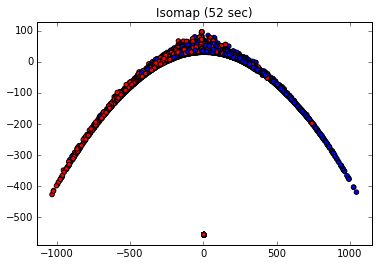

In [4]:
data, color = data_vizualisation_train ()
t0 = time.time()
Y = manifold.Isomap(10, 2).fit_transform(data)
t1 = time.time()
print("Isomap: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
plt.axis('tight')

### ========= Features Importance / Dimensionnality Reduction ==========


Feature ranking for Extra Trees Classifier:
1. feature 6 (0.144802)
2. feature 9 (0.120685)
3. feature 7 (0.114705)
4. feature 10 (0.108805)
5. feature 8 (0.106922)
6. feature 3 (0.090300)
7. feature 2 (0.084396)
8. feature 1 (0.079810)
9. feature 5 (0.077371)
10. feature 4 (0.072203)


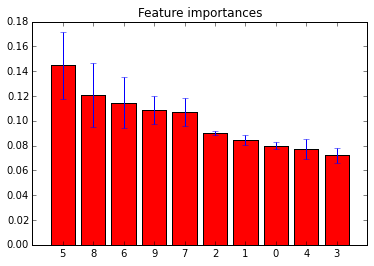

Features importance by methods :
          ADABOOST  GRAD_BOOST  L_SVM  RFE_REG  RFE_SVM   RFT  Stab
ID1_G         0.06        0.64   0.01      0.4      0.2  0.33  0.00
ID2_G         0.08        0.18   0.01      0.2      0.0  0.33  0.00
ID_C_T        0.21        0.40   0.04      0.6      0.4  0.20  0.00
ID_R_G        0.96        1.00   0.63      1.0      1.0  0.76  1.00
ID_T_G        0.11        0.39   0.00      0.0      0.6  0.43  0.00
POINT_P1      0.61        0.69   0.44      1.0      0.8  0.64  0.50
POINT_P2      0.21        0.51   1.00      1.0      1.0  1.00  0.47
POS_P1        0.89        0.50   0.02      1.0      1.0  0.60  0.00
POS_P2        1.00        0.81   0.17      1.0      1.0  0.63  0.00
RANK_T        0.00        0.00   0.68      0.8      1.0  0.00  0.00


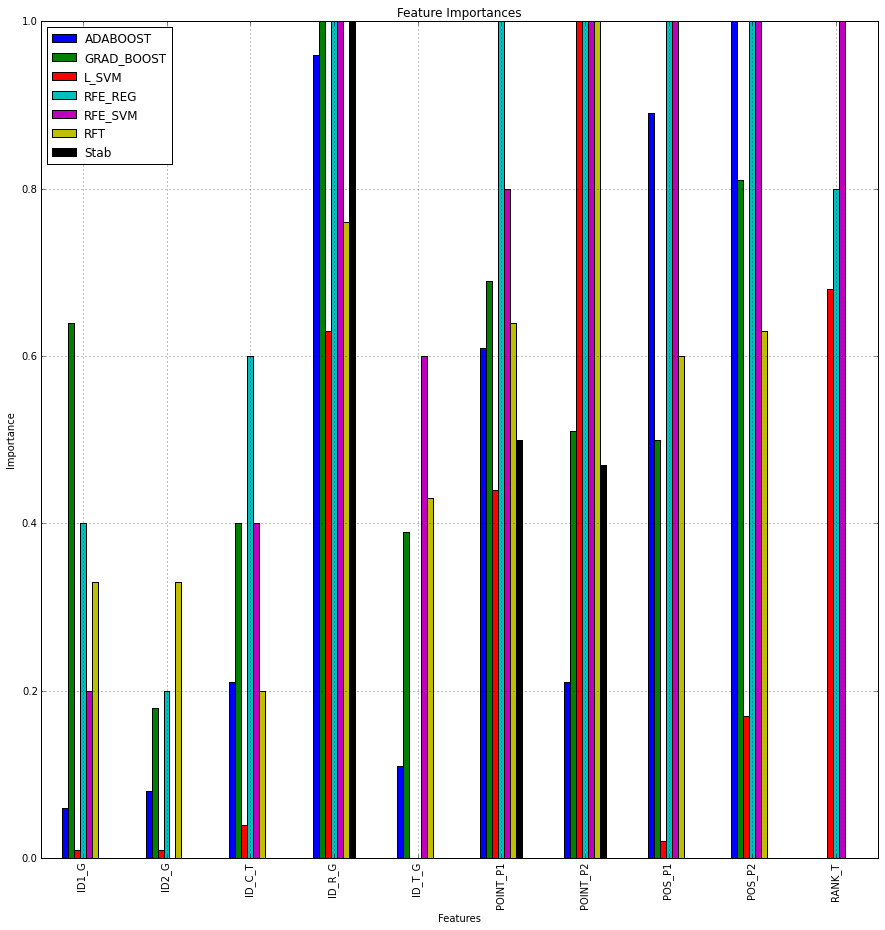

In [36]:
X_normalized = data_normalization (X)
myFeatures_importance_forest (X, y)
# df_train.head(1)
# pca_features_dim_reduction(X, y)
# rfe_nbfeatures(X, y)
features_importance_by_methods(X, y)

<a id='Features Selection'></a>

### =================== Features Selection ====================


In [28]:
sel_feat_adaboost = ['ID1_G', 'ID2_G', 'ID_T_G', 'RANK_T', 'ID_C_T', 'ID_R_G', 'POINT_P1', 'POINT_P2', 'POS_P1', 'POS_P2', 'RANK_T']
sel_feat_gradboost = ['ID1_G', 'ID2_G', 'ID_T_G', 'RANK_T', 'ID_C_T', 'ID_R_G', 'POINT_P2', 'POS_P1', 'POS_P2', 'RANK_T']
sel_feat_rft = ['ID1_G', 'ID2_G', 'ID_T_G', 'RANK_T', 'ID_C_T', 'ID_R_G', 'POINT_P1', 'POINT_P2', 'POS_P1', 'POS_P2', 'RANK_T']

X, y, df_train = import_data('train_court_stats')
df_train = remove_features(df_train, sel_feat_gradboost)
df_train.to_csv('df_train_selected_features_gradboost.csv', sep=',', index=False)
X_gb, y_gb, df_train_gb = import_data('df_train_selected_features_gradboost')

X, y, df_train = import_data('train_court_stats')
df_train = remove_features(df_train, sel_feat_adaboost)
df_train.to_csv('df_train_selected_features_adaboost.csv', sep=',', index=False)
X_ab, y_ab, df_train_ab = import_data('df_train_selected_features_adaboost')

X, y, df_train = import_data('train_court_stats')
df_train = remove_features(df_train, sel_feat_rft)
df_train.to_csv('df_train_selected_features_rft.csv', sep=',', index=False)
X_rft, y_rft, df_train_rft = import_data('df_train_selected_features_rft')


In [30]:
# df_train = remove_features_from_df(df_train)
# df_train.to_csv('df_train_selected_features.csv', sep=',', index=False)
# X, y, df_train = import_data('df_train_selected_features')
# # data_normalization (X)
# # print df_train.head()

<a id='Model Selection'></a>

### =================== Model Selection =====================


Logistic Regression score : 0.683643
KNN score : 0.608168
SVM score : 0.502348
Bagging score : 0.698632
AdaBoost score : 0.716275
Random Forest Tree score : 0.690994
GradientBoosting score : 0.719747


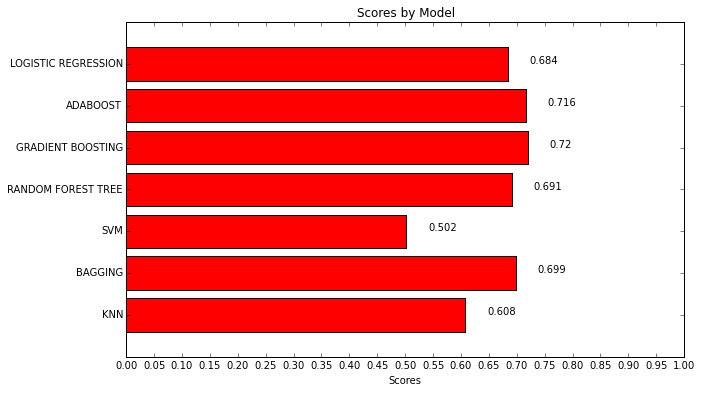

In [124]:
scores = {}
score = get_score_logReg (X, y)
scores['LOGISTIC REGRESSION'] = score
print ('Logistic Regression score : %f' % score)
score = get_score_knn (X, y)
scores['KNN'] = score
print ('KNN score : %f' % score)
score = svm_classif (X, y)
scores['SVM'] = score
print ('SVM score : %f' % score)
score = get_score_bagging (X, y)
scores['BAGGING'] = score
print ('Bagging score : %f' % score)
score = adaboost_classif(X_ab, y_ab)
scores['ADABOOST'] = score
print ('AdaBoost score : %f' % score)
score = rft_classif (X_rft, y_rft)
scores['RANDOM FOREST TREE'] = score
print ('Random Forest Tree score : %f' % score)
score = gradientBoosting_classif(X_gb, y_gb)
scores['GRADIENT BOOSTING'] = score
print ('GradientBoosting score : %f' % score)

plt.figure(figsize = (10, 6))
plt.barh(range(len(scores)), scores.values(), align='center', color='r')
plt.xticks(np.arange(0, 1.05, 0.05))
plt.yticks(range(len(scores)), scores.keys())
plt.xlim(0, 1)
plt.xlabel('Scores')
plt.title('Scores by Model')
# plt.grid(True)
cpt=1
for m,n in scores.items() :
    plt.annotate(str(round(n, 3)),
                 (n, cpt*0.04),
                 xytext=(n+0.04,cpt-1))
    cpt+=1

##### On trouve que le meilleur modèle pour nos données est Gradient Boosting avec des arbres de décisions comme classifieurs.

<a id='Model Tuning'></a>

<a id='Model Tuning'></a>

### ===================== Model Tuning =======================


In [32]:
# gridSearch_gradBoost(X, y)

In [29]:
# svm_tuning (X, y)
rft_tuning(X,y)
print ('\n')
adaboost_tuning (X, y)
print ('\n')
gradientBoosting_tuning(X, y)

Random Forest Tree tuning :
---------------------------
On constate que le nombre d'estimateurs = 600 donne de meilleurs résultats.
On constate que le criterion entropy donne de meilleurs résultats.


AdaBoost tuning : 
-----------------
On constate que l'algorithme SAMME.R donne de meilleurs résultats.
On constate qu'une max_depth de 3 pour les arbres donne de meilleurs résultats.
On constate qu'un n_estimators de 200 donne de meilleurs résultats.
On constate qu'un learning_rate de 0.56 donne de meilleurs résultats.
Highest score with good AdaBoost configurations : 0.726935


GradientBoost tuning :
----------------------
On constate que la deviance loss donne de meilleurs résultats.
On constate qu'un nombre d'estimateurs de 100 donne de meilleurs résultats.
On constate qu'un learning_rate de 0.30 donne de meilleurs résultats.
On constate qu'une profondeur max de 3 donne de meilleurs résultats.
Highest score with good GradientBoosting configurations : 0.728650


<a id='Test du Modèle Final'></a>

### ===================== Test du Modèle Final =======================


In [30]:
sel_feat_gradboost = ['ID1_G', 'ID2_G', 'ID_T_G', 'RANK_T', 'ID_C_T', 'ID_R_G', 'POINT_P2', 'POS_P1', 'POS_P2', 'RANK_T']

X, y, df_train = import_data('train_court_stats')

df_train = remove_features_from_df(df_train)
df_train.to_csv('df_train_selected_features.csv', sep=',', index=False)
X, y, df_train = import_data('df_train_selected_features')
grdboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=0)
grdboost.fit(X[:60000, :], y[:60000])
print grdboost.score(X[60000:, :], y[60000:])


0.729099448642


##### On essai le modèle Gradient Boosting après tuning  :
On obtient un score de ~72,9% .

<a id='Prediction'></a>

### ====================== Prediction =======================


In [ ]:
# test_public= pd.read_csv('test_court_stats.csv')
# #print test_public.head(20)
# test_public = remove_features_from_df(test_public)
# #print test_public.head(20)
# test_public.to_csv('df_test_selected_features.csv', sep=',', index=False)
# X_test, y_test, df_test = import_data('df_test_selected_features')
# X_test = df_test.values
# data_normalization (X_test)

# print test_public.head()

# prediction_rft = rft_predict(X, y, X_test)
# print prediction_rft
# prediction_gradBoosting = gradientBoosting_predict(X, y, X_test)
# print prediction_gradBoosting


<a id='Data Visualisation sur Test'></a>

### ===================== Data Vizualisation sur Test =======================


Isomap: 30 sec


(-60254.089917945428,
 43209.1417315117,
 -44495.285598953917,
 46111.372021577656)

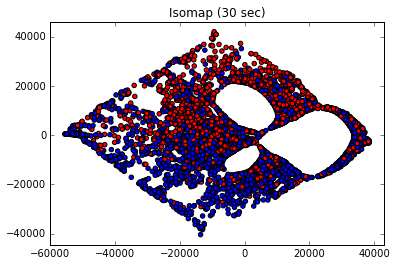

In [8]:
dataTest, colorTest = data_vizualisation_for_test ()
t0 = time.time()
Y = manifold.Isomap(10, 2).fit_transform(dataTest)
t1 = time.time()
print("Isomap: %.2g sec" % (t1 - t0))
plt.scatter(Y[:, 0], Y[:, 1], c=colorTest, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
plt.axis('tight')

<a id='---> To Leaderboard'></a>

### ======================== ---> To Leaderboard =====================


In [ ]:
# df_leaderboard_rtf_stats = df_test[['ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G', 'POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio']]
# df_leaderboard_rtf_stats['predictions'] = prediction_rft
# df_leaderboard_rtf_stats = df_leaderboard_rtf_stats.drop(['POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio'], 1)
# df_leaderboard_rtf_stats.head(10)

In [ ]:
# df_leaderboard_rtf_stats.to_csv('leaderboard_rtf_stats.csv', sep=',', index=False, header= False)

In [ ]:
# df_leaderboard_gradB_stats = df_test[['ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G', 'POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio']]
# df_leaderboard_gradB_stats['predictions'] = prediction_gradBoosting
# df_leaderboard_gradB_stats = df_leaderboard_gradB_stats.drop(['POS_P1', 'diff_rating', 'diff_wins_for_tour', 'diff_wins_for_tour_ratio', 'diff_wins_for_court', 'diff_wins_for_court_ratio'], 1)
# df_leaderboard_gradB_stats.head(10)

In [ ]:
# df_leaderboard_gradB_stats.to_csv('leaderboard_gradB_stats.csv', sep=',', index=False, header= False)